In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fir_df = pd.read_csv("/content/drive/MyDrive/Datathon/Copy of Copy of FIR_Details_Data.csv")
chargesheet_df=pd.read_csv("/content/drive/MyDrive/Datathon/Copy of ChargsheetedDetails.csv")

<ipython-input-3-b9203cb1ff0d>:1: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  fir_df = pd.read_csv("/content/drive/MyDrive/Datathon/Copy of Copy of FIR_Details_Data.csv")


In [ ]:
chargesheet_df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month', 'FIR_Date',
       'Report_Date', 'Final_Report_Date', 'Report_Type', 'FIR_ID', 'Unit_ID',
       'Crime_No', 'FR_ID'],
      dtype='object')

In [ ]:
len(fir_df['District_Name'].unique())

41

In [ ]:
chargesheet_df.head()

,District_Name,UnitName,FIRNo,RI,Year,Month,FIR_Date,Report_Date,Final_Report_Date,Report_Type,FIR_ID,Unit_ID,Crime_No,FR_ID
0,Bagalkot,Amengad PS,0001/2016,1,2016,1,2016-01-05 11:00:00.000,2016-01-29 00:00:00.000,NaN,NaN,2016000002,1245,10470124520160001,2.016000e+09
1,Bagalkot,Amengad PS,0002/2016,1,2016,1,2016-01-12 19:00:00.000,2016-01-20 00:00:00.000,NaN,NaN,2016000003,1245,10470124520160002,2.016000e+09
2,Bagalkot,Amengad PS,0003/2016,1,2016,1,2016-01-12 19:30:00.000,2016-01-12 00:00:00.000,NaN,NaN,2016000004,1245,10470124520160003,2.016000e+09
3,Bagalkot,Amengad PS,0004/2016,1,2016,1,2016-01-15 14:00:00.000,2016-02-10 00:00:00.000,NaN,NaN,2016000005,1245,10470124520160004,2.016000e+09
4,Bagalkot,Amengad PS,0005/2016,1,2016,1,2016-01-18 19:30:00.000,2016-02-06 00:00:00.000,NaN,NaN,2016000006,1245,10470124520160005,2.016000e+09


In [ ]:
# Removing Duplicate FIR IDs from FIR DF
fir_df = fir_df.drop_duplicates(subset=["FIR_ID"])
len(fir_df)

26004

In [ ]:
# Removing Duplicate FIR IDs from Charge Sheet DF
chargesheet_df = chargesheet_df.drop_duplicates(subset=["FIR_ID"])
# Taking only Report Date from Charge Sheet DF
chargesheet_df = chargesheet_df[["FIR_ID","Report_Date"]]

In [ ]:
# Merging Charge sheet and FIR DF using FIR ID
merge_df = pd.merge(fir_df, chargesheet_df, how="inner", on=["FIR_ID"])

## Cleaning Process

In [ ]:
merge_df.columns

Index(['District_Name', 'UnitName', 'FIRNo', 'RI', 'Year', 'Month',
       'Offence_From_Date', 'Offence_To_Date', 'FIR_Reg_DateTime', 'FIR_Date',
       'FIR Type', 'FIR_Stage', 'Complaint_Mode', 'CrimeGroup_Name',
       'CrimeHead_Name', 'Latitude', 'Longitude', 'ActSection', 'IOName',
       'KGID', 'IOAssigned_Date', 'Internal_IO', 'Place of Offence',
       'Distance from PS', 'Beat_Name', 'Village_Area_Name', 'Male', 'Female',
       'Boy', 'Girl', 'Age 0', 'VICTIM COUNT', 'Accused Count',
       'Arrested Male', 'Arrested Female', 'Arrested Count\tNo.',
       'Accused_ChargeSheeted Count', 'Conviction Count', 'FIR_ID', 'Unit_ID',
       'Crime_No', 'Report_Date'],
      dtype='object')

In [ ]:
# Remove unnecessary Columns
merge_df = merge_df.drop(["RI","KGID",'IOAssigned_Date', 'Internal_IO'],axis=1)

In [ ]:
# Renaming Columns to Snake Case
merge_df.columns = merge_df.columns.str.replace(' ', '_').str.replace('\t', '').str.replace('__', '_').str.lower()

merge_df.rename(columns={"ioname":"io_name","arrested_countno.":"arrested_count"},inplace=True)
# Display the DataFrame with updated column names
print(merge_df.columns)

Index(['district_name', 'unitname', 'firno', 'year', 'month',
       'offence_from_date', 'offence_to_date', 'fir_reg_datetime', 'fir_date',
       'fir_type', 'fir_stage', 'complaint_mode', 'crimegroup_name',
       'crimehead_name', 'latitude', 'longitude', 'actsection', 'io_name',
       'place_of_offence', 'distance_from_ps', 'beat_name',
       'village_area_name', 'male', 'female', 'boy', 'girl', 'age_0',
       'victim_count', 'accused_count', 'arrested_male', 'arrested_female',
       'arrested_count', 'accused_chargesheeted_count', 'conviction_count',
       'fir_id', 'unit_id', 'crime_no', 'report_date'],
      dtype='object')


In [ ]:
merge_df["report_date"]

0        2016-01-29 00:00:00.000
1        2016-01-20 00:00:00.000
2        2016-01-12 00:00:00.000
3        2016-02-10 00:00:00.000
4        2016-02-06 00:00:00.000
                  ...           
25999    2022-05-21 00:00:00.000
26000                        NaN
26001    2022-04-10 00:00:00.000
26002                        NaN
26003    2021-12-13 00:00:00.000
Name: report_date, Length: 26004, dtype: object

## Preprocessing

In [ ]:
# New Column for Designation
temp = merge_df
designation = []
def get_officer_name(x:str):
  x_split = x.split("(")
  name = x_split[0].strip()
  temp_designation = x_split[1].split(")")[0].strip()
  designation.append(temp_designation)
  return name
temp["io_name"] = temp["io_name"].apply(get_officer_name)
temp["designation"] = designation
merge_df = temp

In [ ]:
temp = merge_df
# Formatting Date
from datetime import datetime
# FIR Date
def format_fir_date(x):
  x = str(x)
  if(x.lower() == "nan"):
    return ""
  return datetime.strptime(x, "%d/%m/%Y")
# Report Date
def format_report_date(x) -> datetime:
  x = str(x)
  x = x.strip()[:10]
  if(x.lower() == "nan"):
    return ""
  return datetime.strptime(x,"%Y-%m-%d")
temp["fir_date"] = temp["fir_date"].apply(format_fir_date)
merge_df = temp.copy()
merge_df["report_date"] = pd.to_datetime(merge_df["report_date"].str[:10], format="%Y-%m-%d")

In [ ]:
# formatted_report_dates = [datetime.strptime(x, "%Y-%m-%d") if x not in ["nan", None] else "" for x in temp["report_date"]]
# formatted_report_dates


In [ ]:

# Formatting Datetime
temp = merge_df
# FIR Reg Date
temp = merge_df
temp["fir_reg_datetime"] = pd.to_datetime(temp["fir_reg_datetime"])
temp["offence_to_date"] = pd.to_datetime(temp["offence_to_date"])
merge_df = temp

In [ ]:
merge_df.to_csv("demo43.csv")

In [ ]:
# Response Time Calculation
# Calculate duration_fir in hours
merge_df['response_time_hours'] = (merge_df['fir_reg_datetime'] - merge_df['offence_to_date']) / pd.Timedelta(hours=1)
# Calculate duration_fir in days
merge_df['response_time'] = merge_df['response_time_hours'] / 24

In [ ]:
# Duration taken for submitting report
import math
merge_df["duration"] = (merge_df["report_date"] - merge_df["fir_reg_datetime"]) / pd.Timedelta(hours=1)
merge_df["duration"] = abs(merge_df["duration"] / 24)
merge_df.head()

,district_name,unitname,firno,year,month,offence_from_date,offence_to_date,fir_reg_datetime,fir_date,fir_type,...,accused_chargesheeted_count,conviction_count,fir_id,unit_id,crime_no,report_date,designation,response_time_hours,response_time,duration
0,Bagalkot,Amengad PS,0001/2016,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00,2016-01-05 11:00:00,2016-01-05,Non Heinous,...,1,0,2016000002,1245,10470124520160001,2016-01-29,PI,214.916667,8.954861,23.541667
1,Bagalkot,Amengad PS,0002/2016,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00,2016-01-12 19:00:00,2016-01-12,Non Heinous,...,5,2,2016000003,1245,10470124520160002,2016-01-20,PSI,1.416667,0.059028,7.208333
2,Bagalkot,Amengad PS,0003/2016,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00,2016-01-12 19:30:00,2016-01-12,Non Heinous,...,1,0,2016000004,1245,10470124520160003,2016-01-12,ASI,1.666667,0.069444,0.812500
3,Bagalkot,Amengad PS,0004/2016,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00,2016-01-15 14:00:00,2016-01-15,Non Heinous,...,1,0,2016000005,1245,10470124520160004,2016-02-10,PI,16.416667,0.684028,25.416667
4,Bagalkot,Amengad PS,0005/2016,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00,2016-01-18 19:30:00,2016-01-18,Heinous,...,1,0,2016000006,1245,10470124520160005,2016-02-06,PI,4.416667,0.184028,18.187500


In [ ]:
# Calculating ppc - performance per crime
merge_df["ppc"] = (merge_df["duration"] - (merge_df["response_time"] * 0.25))
merge_df.head()

,district_name,unitname,firno,year,month,offence_from_date,offence_to_date,fir_reg_datetime,fir_date,fir_type,...,conviction_count,fir_id,unit_id,crime_no,report_date,designation,response_time_hours,response_time,duration,ppc
0,Bagalkot,Amengad PS,0001/2016,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00,2016-01-05 11:00:00,2016-01-05,Non Heinous,...,0,2016000002,1245,10470124520160001,2016-01-29,PI,214.916667,8.954861,23.541667,21.302951
1,Bagalkot,Amengad PS,0002/2016,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00,2016-01-12 19:00:00,2016-01-12,Non Heinous,...,2,2016000003,1245,10470124520160002,2016-01-20,PSI,1.416667,0.059028,7.208333,7.193576
2,Bagalkot,Amengad PS,0003/2016,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00,2016-01-12 19:30:00,2016-01-12,Non Heinous,...,0,2016000004,1245,10470124520160003,2016-01-12,ASI,1.666667,0.069444,0.812500,0.795139
3,Bagalkot,Amengad PS,0004/2016,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00,2016-01-15 14:00:00,2016-01-15,Non Heinous,...,0,2016000005,1245,10470124520160004,2016-02-10,PI,16.416667,0.684028,25.416667,25.245660
4,Bagalkot,Amengad PS,0005/2016,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00,2016-01-18 19:30:00,2016-01-18,Heinous,...,0,2016000006,1245,10470124520160005,2016-02-06,PI,4.416667,0.184028,18.187500,18.141493


In [ ]:
# Calculating OAPC - Optimal Arrest Per Crime
merge_df["oapc"] = merge_df["arrested_count"]-merge_df["conviction_count"]
merge_df.head()

,district_name,unitname,firno,year,month,offence_from_date,offence_to_date,fir_reg_datetime,fir_date,fir_type,...,fir_id,unit_id,crime_no,report_date,designation,response_time_hours,response_time,duration,ppc,oapc
0,Bagalkot,Amengad PS,0001/2016,2016,1,2015-12-27 12:00:00.000,2015-12-27 12:05:00,2016-01-05 11:00:00,2016-01-05,Non Heinous,...,2016000002,1245,10470124520160001,2016-01-29,PI,214.916667,8.954861,23.541667,21.302951,1
1,Bagalkot,Amengad PS,0002/2016,2016,1,2016-01-12 17:30:00.000,2016-01-12 17:35:00,2016-01-12 19:00:00,2016-01-12,Non Heinous,...,2016000003,1245,10470124520160002,2016-01-20,PSI,1.416667,0.059028,7.208333,7.193576,3
2,Bagalkot,Amengad PS,0003/2016,2016,1,2016-01-12 17:45:00.000,2016-01-12 17:50:00,2016-01-12 19:30:00,2016-01-12,Non Heinous,...,2016000004,1245,10470124520160003,2016-01-12,ASI,1.666667,0.069444,0.812500,0.795139,1
3,Bagalkot,Amengad PS,0004/2016,2016,1,2016-01-14 21:30:00.000,2016-01-14 21:35:00,2016-01-15 14:00:00,2016-01-15,Non Heinous,...,2016000005,1245,10470124520160004,2016-02-10,PI,16.416667,0.684028,25.416667,25.245660,1
4,Bagalkot,Amengad PS,0005/2016,2016,1,2016-01-18 15:00:00.000,2016-01-18 15:05:00,2016-01-18 19:30:00,2016-01-18,Heinous,...,2016000006,1245,10470124520160005,2016-02-06,PI,4.416667,0.184028,18.187500,18.141493,1


In [ ]:
# Filter the DataFrame based on FIR type (heinous or non-heinous)
heinous_fir_df = merge_df[merge_df['fir_type'] == 'Heinous']
non_heinous_fir_df = merge_df[merge_df['fir_type'] == 'Non Heinous']

# Group by IOName and count occurrences for heinous FIRs
heinous_count = heinous_fir_df.groupby('io_name').size().reset_index(name='heinous_count')

# Group by IOName and count occurrences for non-heinous FIRs
non_heinous_count = non_heinous_fir_df.groupby('io_name').size().reset_index(name='non_heinous_count')

# Merge the counts for heinous and non-heinous FIRs based on IOName
io_counts = pd.merge(heinous_count, non_heinous_count, on='io_name', how='outer').fillna(0)

grouped_temp = io_counts.groupby('io_name').agg({
    'heinous_count': 'sum',
    'non_heinous_count': 'sum'
}).reset_index()

grouped_temp["heinous_count"] = grouped_temp["heinous_count"].astype(int)
grouped_temp["non_heinous_count"] = grouped_temp["non_heinous_count"].astype(int)
# Now you can access the grouped data
merge_df = pd.merge(grouped_temp, merge_df, on=["io_name"], how="inner")

In [ ]:
# Calculating Convicted Count
fir_stage_df = merge_df.groupby(["io_name","fir_stage"])["fir_stage"].count().reset_index(name="count")
convicted_count_df = fir_stage_df[fir_stage_df["fir_stage"] == "Convicted"]
convicted_count_df.rename(columns={"count":"convicted_count"}, inplace=True)
convicted_count_df.drop(columns=["fir_stage"], inplace=True)
traced_count_df = fir_stage_df[fir_stage_df["fir_stage"] == "Traced"]
traced_count_df.rename(columns={"count":"traced_count"}, inplace=True)
traced_count_df.drop(columns=["fir_stage"], inplace=True)


<ipython-input-87-6808f3b0e9be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convicted_count_df.rename(columns={"count":"convicted_count"}, inplace=True)
<ipython-input-87-6808f3b0e9be>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  convicted_count_df.drop(columns=["fir_stage"], inplace=True)
<ipython-input-87-6808f3b0e9be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traced_count_df.rename(columns={"count":"traced_count"}, i

In [ ]:
merge_df = pd.merge(merge_df, convicted_count_df, on=["io_name"], how="left")
merge_df = pd.merge(merge_df, traced_count_df, on=["io_name"], how="left")

In [ ]:
merge_df["convicted_count"] = merge_df["convicted_count"].fillna(0)
merge_df["traced_count"] = merge_df["traced_count"].fillna(0)

In [ ]:
merge_df.columns

Index(['io_name', 'heinous_count', 'non_heinous_count', 'district_name',
       'unitname', 'firno', 'year', 'month', 'offence_from_date',
       'offence_to_date', 'fir_reg_datetime', 'fir_date', 'fir_type',
       'fir_stage', 'complaint_mode', 'crimegroup_name', 'crimehead_name',
       'latitude', 'longitude', 'actsection', 'place_of_offence',
       'distance_from_ps', 'beat_name', 'village_area_name', 'male', 'female',
       'boy', 'girl', 'age_0', 'victim_count', 'accused_count',
       'arrested_male', 'arrested_female', 'arrested_count',
       'accused_chargesheeted_count', 'conviction_count', 'fir_id', 'unit_id',
       'crime_no', 'report_date', 'designation', 'response_time_hours',
       'response_time', 'duration', 'ppc', 'oapc', 'convicted_count',
       'traced_count'],
      dtype='object')

In [ ]:
# Calculating OAPC Avarage
temp = merge_df.groupby(["io_name"])['oapc'].mean().to_frame()
temp.rename(columns={"oapc":"oapc_average"},inplace=True)
merge_df = pd.merge(temp, merge_df, on=["io_name"], how="inner")
merge_df.head()

,io_name,oapc_average,heinous_count,non_heinous_count,district_name,unitname,firno,year,month,offence_from_date,...,crime_no,report_date,designation,response_time_hours,response_time,duration,ppc,oapc,convicted_count,traced_count
0,A K AGSAR,3.0,0,1,Belagavi City,Marihal PS,0363/2016,2016,12,2016-12-20 18:00:00.000,...,10982145720160363,2017-05-21,ASI,95.416667,3.975694,147.270833,146.276910,3,0.0,0.0
1,A M HUKKERI,0.0,0,1,Belagavi Dist,Khanapur PS,0444/2017,2017,9,2017-09-10 16:50:00.000,...,10444031420170444,2017-09-30,HC,2.500000,0.104167,19.187500,19.161458,0,1.0,0.0
2,A M YARAGATTI,0.0,0,1,Belagavi City,Market PS,0406/2016,2016,11,2016-11-10 13:00:00.000,...,10982029220160406,NaT,ASI,0.916667,0.038194,NaN,NaN,0,0.0,0.0
3,A RAJEEV,1.0,1,6,Bengaluru City,Byadarahalli PS,0550/2018,2018,10,2018-10-01 20:30:00.000,...,10977212320180550,2019-01-11,PI,22.000000,0.916667,100.208333,99.979167,3,0.0,0.0
4,A RAJEEV,1.0,1,6,Bengaluru City,Byadarahalli PS,0573/2018,2018,10,2018-10-07 22:00:00.000,...,10977212320180573,NaT,PI,130.000000,5.416667,NaN,NaN,0,0.0,0.0


In [ ]:
# PPC Average
# Heionous Average
temp = heinous_fir_df.groupby(["io_name"])["ppc"].mean().to_frame()
temp.rename(columns={"ppc":"ppc_average_heinous"}, inplace=True)
merge_df = pd.merge(merge_df, temp, on=["io_name"], how="left")
# Non Heinous Average
temp = non_heinous_fir_df.groupby(["io_name"])["ppc"].mean().to_frame()
temp.rename(columns={"ppc":"ppc_average_non_heinous"}, inplace=True)
merge_df = pd.merge(merge_df, temp, on=["io_name"], how="left")

# Case solved by that IO


In [ ]:
# Filling NaN in PPC Average Columns
merge_df["ppc_average_heinous"] = merge_df["ppc_average_heinous"].fillna(0)
merge_df["ppc_average_non_heinous"] = merge_df["ppc_average_non_heinous"].fillna(0)
# Secure Score Calculation
merge_df["secure_score"] = 0
def calculate_secure_score(row):
  x = 0
  if row["ppc_average_heinous"] != 0:
    x = row["heinous_count"] / row["ppc_average_heinous"]
  y = 0
  if row["ppc_average_non_heinous"] != 0:
    y = row["non_heinous_count"] / row["ppc_average_non_heinous"]

  total_cases = row["non_heinous_count"] + row["heinous_count"]
  result = (x * 2)  + y - (0.25 * row["oapc_average"])
  result += row["convicted_count"]
  result += row["traced_count"]
  result += (total_cases - row["convicted_count"] - row["traced_count"]) * 0.25
  return result if result != 0 else None

merge_df["secure_score"] = merge_df.apply(calculate_secure_score,axis=1)

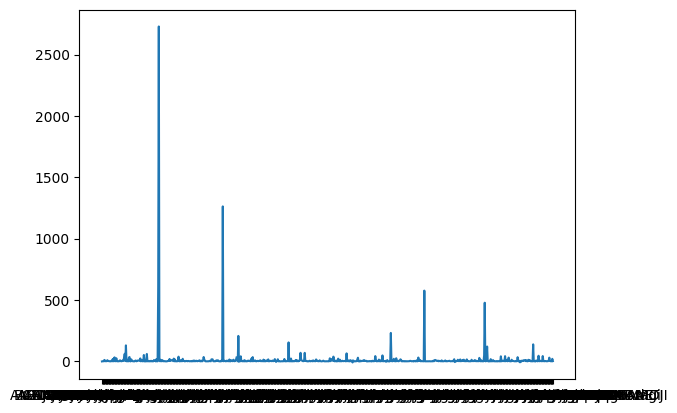

In [ ]:
import matplotlib.pyplot as plt
plt.plot(merge_df["io_name"],merge_df["secure_score"])

In [ ]:
sorted = merge_df.sort_values("secure_score",ascending=False)
# sorted[11000:11100]
sorted.head()

In [ ]:
temp = merge_df
temp["normalized_secure_score"] = (merge_df["secure_score"] - merge_df["secure_score"].min()) / (merge_df["secure_score"].max() - merge_df["secure_score"].min())
temp.head()
temp.to_csv("normalized.csv")

In [ ]:
# plt.plot(normalized_df["norm_calc"],normalized_df["io_name"])
temp.head()

In [ ]:
temp[temp["io_name"] == "YELLAPPA K"]

In [ ]:
temp[temp["io_name"] == "CHANDRAKALA M B"]

In [ ]:
convicted_case = merge_df[merge_df["io_name"] == "YELLAPPA K"].groupby(["fir_stage"])["fir_stage"].count().reset_index(name="count")


In [ ]:
! pip install csv-to-sqlite


In [ ]:
import csv_to_sqlite

# all the usual options are supported
options = csv_to_sqlite.CsvOptions(typing_style="full")
input_files = ["normalized.csv"] # pass in a list of CSV files
csv_to_sqlite.write_csv(input_files, "main.db", options)


Written 26004 rows into 1 tables in 4.834 seconds


26004